# Load Packages

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

# Import your data

In [224]:
data = pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Data Analysis/Billionaire.csv")

In [225]:
data.tail(60)

,Name,NetWorth,Country,Source,Rank,Age,Industry
2695,Hur Young-in,$1 B,South Korea,"bakeries, fast food",2674,71.0,Food & Beverage
2696,Jiang Long,$1 B,China,Manufacturing,2674,47.0,Technology
2697,Morris Kahn,$1 B,Israel,software,2674,91.0,Technology
2698,Ashok Kajaria,$1 B,India,tiles,2674,73.0,Manufacturing
2699,T.S. Kalyanaraman,$1 B,India,jewelry,2674,73.0,Fashion & Retail
2700,Kim Kardashian West,$1 B,United States,"cosmetics, reality TV",2674,40.0,Fashion & Retail
2701,David Katzman,$1 B,United States,teeth aligners,2674,61.0,Service
2702,Bom Kim,$1 B,United States,online retailing,2674,42.0,Technology
2703,Masatoshi Kumagai,$1 B,Japan,internet services,2674,57.0,Technology
2704,Lev Kvetnoi,$1 B,Russia,cement,2674,55.0,Finance & Investments


# Questions

1. Which top 10 industries have the highest NetWorth?
2. Which countries have the highest of NetWorth?
3. Who are the top billionaires in Asia?
4. Who are the top billionaires in Africa?
5. How many billionaires do we have in America?
6. How many billionaires are under age 40 in the world?
7. Which countries have the least number of billionaires?

# Preprocessing
#### Preprocessing is done to check the quality of data. The following methods can be used to check the quality of the data.
#### - Data types
#### - Missing data
#### - Categorical variable values
#### - Continuos variable values
#### - Duplicated records
#### - Custom rule based checks 
ie. After you check for duplicated records, you should go through your columns and perform custom rule based checks where appropriate.

This just means that you should look at each column and determine whether there is any standard format the values should be in then check whether the values are in that format. 

For example, you might check that email addresses have an @ in them and that phone numbers are strictly numeric with the correct number of digits. 

You may find that you need to perform additional standardization such as removing dashes or parentheses from phone numbers that are formatted incorrectly.  

In [28]:
data.shape

(2755, 7)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [30]:
# Remove dollar signs and B symbol
data["NetWorth"]

0       $177 B
1       $151 B
2       $150 B
3       $124 B
4        $97 B
         ...  
2750      $1 B
2751      $1 B
2752      $1 B
2753      $1 B
2754      $1 B
Name: NetWorth, Length: 2755, dtype: object

In [31]:
data["NetWorth"] = data.NetWorth.apply(lambda x:str(x).replace("B",""))
# data["NetWorth"] = data["NetWorth"].str.strip("B")

In [32]:
data["NetWorth"] = data.NetWorth.apply(lambda x:str(x).replace("$", ""))
# data["NetWorth"] = data["NetWorth"].str.strip("$")

In [34]:
data["NetWorth"] = data.NetWorth.apply(lambda x:str(x).replace(" ",""))

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [36]:
data["NetWorth"] = data.NetWorth.apply(lambda x:float(x))
# data["NetWorth"] = data["NetWorth"].astype(float)

In [38]:
data.dtypes

Name         object
NetWorth    float64
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

In [40]:
# Check for missing values
data.isna().any()

Name        False
NetWorth    False
Country     False
Source      False
Rank        False
Age          True
Industry    False
dtype: bool

In [41]:
data.isna().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [62]:
data_missing = data[data.isna().Age]

In [67]:
data_missing

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,9.1,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,8.8,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,8.7,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,8.4,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,1.1,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,1.1,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,1.0,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,1.0,Canada,packaged meats,2674,NaN,Food & Beverage


In [68]:
data_drop_Age = data.dropna()

In [69]:
data_drop_Age.shape

(2676, 7)

In [71]:
# Check for duplicated values
data.duplicated().sum()

0

In [72]:
data.describe()

,NetWorth,Rank,Age
count,2755.000000,2755.000000,2676.000000
mean,4.749220,1345.663521,63.113602
std,9.615358,772.669811,13.445153
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,63.000000
75%,4.200000,2035.000000,73.000000
max,177.000000,2674.000000,99.000000


array([[<AxesSubplot:title={'center':'NetWorth'}>,
        <AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

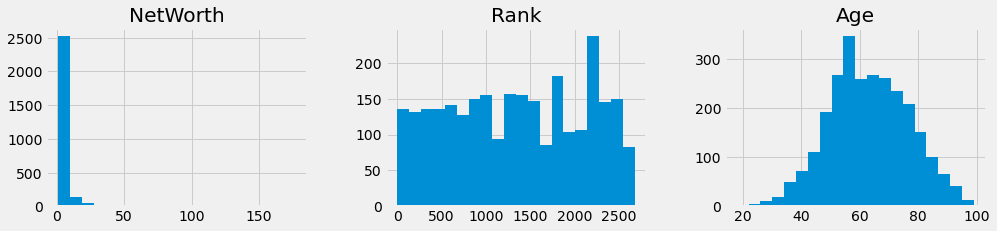

In [223]:
data.hist(
    figsize=(15,15),
    layout=(4,3),
    bins=20
    )

In [84]:
youngest_billionaire = data[data.Age == 18]

In [85]:
youngest_billionaire 

,Name,NetWorth,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18.0,Fashion & Retail


# Analysis

## 1. Which top 10 industries have the highest NetWorth?

In [121]:
Top_10_Industries = data.groupby("Industry")["NetWorth"].sum().reset_index()
Top_10_Industries = Top_10_Industries.sort_values(by="NetWorth", ascending = False)
Top_10_Industries

,Industry,NetWorth
16,Technology,2456.7
4,Fashion & Retail,1697.6
5,Finance & Investments,1527.9
10,Manufacturing,1119.9
6,Food & Beverage,1029.9
2,Diversified,868.1
13,Real Estate,815.8
8,Healthcare,790.7
11,Media & Entertainment,481.3
0,Automotive,467.5


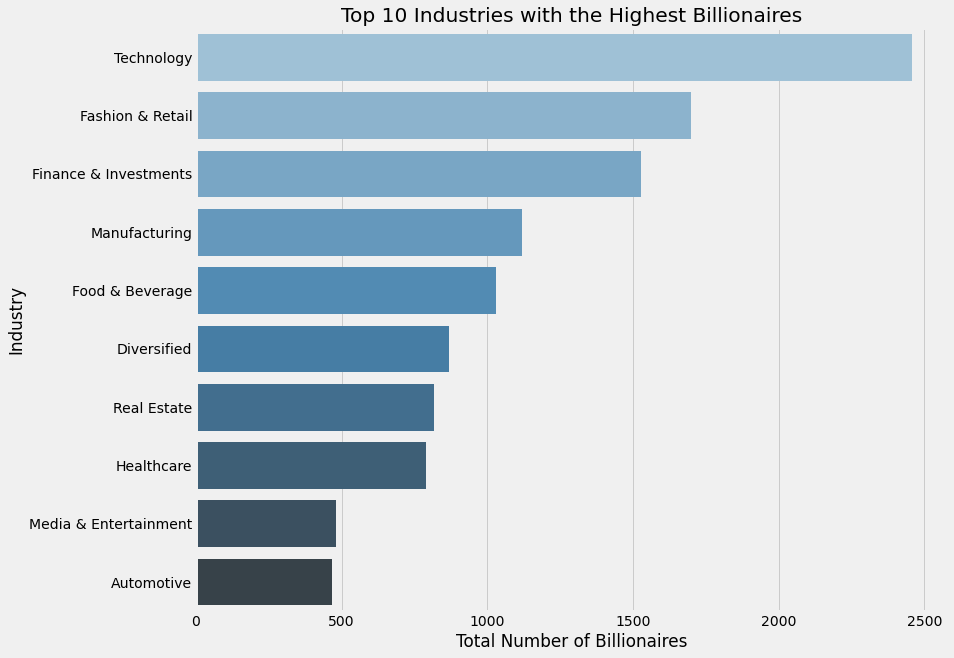

In [119]:
plt.figure(figsize=(12,10))
plt.title("Top 10 Industries with the Highest Billionaires")
plt.style.use("fivethirtyeight")
sns.barplot(y="Industry", x="NetWorth",palette="Blues_d", data=Top_10_Industries.iloc[:10])

plt.ylabel("Industry")
plt.xlabel("Total Number of Billionaires")


plt.show()

## 2. Which countries have the highest of NetWorth?

In [122]:
Top_10_Countries = data.groupby("Country")["NetWorth"].sum().reset_index()
Top_10_Countries = Top_10_Countries.sort_values(by="NetWorth", ascending = False)
Top_10_Countries

,Country,NetWorth
66,United States,4398.4
8,China,2531.9
18,Germany,625.5
24,India,596.4
50,Russia,586.0
...,...,...
43,Oman,2.3
56,St. Kitts and Nevis,1.6
60,Tanzania,1.6
69,Zimbabwe,1.5


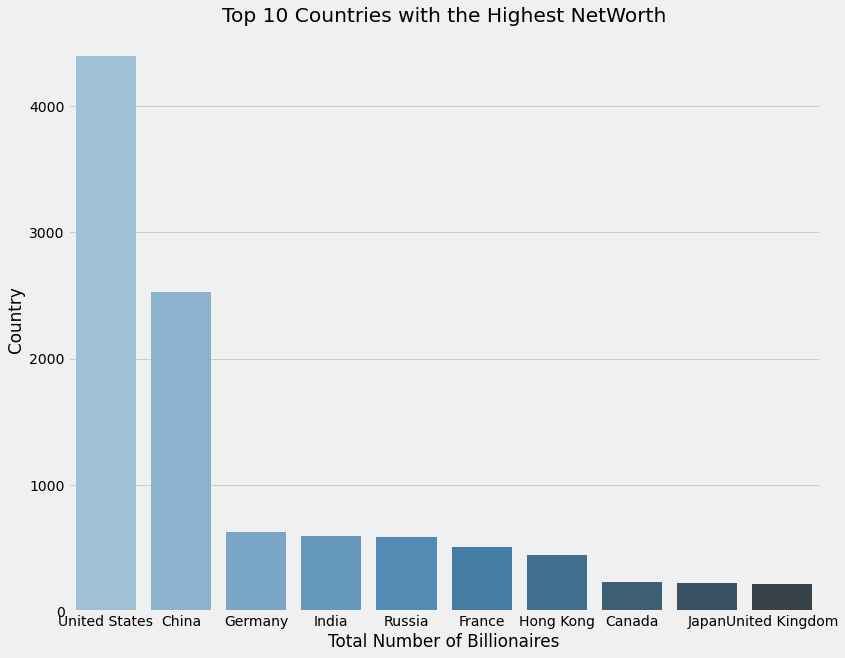

In [211]:
plt.figure(figsize=(12,10))
plt.title("Top 10 Countries with the Highest NetWorth")
#plt.style.use("fivethirtyeight")
sns.barplot(y="NetWorth", x="Country",palette="Blues_d", data=Top_10_Countries.iloc[:10])

plt.ylabel("Country")
plt.xlabel("Total Number of Billionaires")


plt.show()

In [ ]:
# Wrtie a function for groupby since we will use it repeatedly

def billionaires(y="", x=""):
    Top_10= data.groupby(y)[x].sum().reset_index()
    Top_10 = Top_10_Industries.sort_values(by=x, ascending = False)
    
    return Top_10

## 3. Who are the top billionaires in Asia?

In [138]:
from getconti import getConti

# create an object of getConti
a = getConti()

# usage
india_continent = a.getContinents("India")

# it return continent name as string
china_continent = a.getContinents("china")

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti


In [139]:
china_continent

'Asia'

In [142]:
data["Continent"] = data.Country.apply(lambda x: getConti().getContinents(x))

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getconti
C:\Users\GetInnotized\anaconda3\lib\site-packages\getcon

In [143]:
data

,Name,NetWorth,Country,Source,Rank,Age,Industry,Continent
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology,North America
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive,North America
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail,Europe
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology,North America
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology,North America
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,Technology,Asia
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,Manufacturing,Asia
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,Metals & Mining,Asia
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,Diversified,Asia


In [157]:
billionaires_Asia = data[data.Continent == "Asia"].sort_values(by= "NetWorth", ascending = False).head(10)

In [158]:
billionaires_Asia

,Name,NetWorth,Country,Source,Rank,Age,Industry,Continent
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified,Asia
12,Zhong Shanshan,68.9,China,"beverages, pharmaceuticals",13,66.0,Food & Beverage,Asia
14,Ma Huateng,65.8,China,internet media,15,49.0,Technology,Asia
20,Colin Zheng Huang,55.3,China,e-commerce,21,41.0,Technology,Asia
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58.0,Diversified,Asia
25,Jack Ma,48.4,China,e-commerce,26,56.0,Technology,Asia
28,Masayoshi Son,45.4,Japan,"internet, telecom",29,63.0,Telecom,Asia
30,Tadashi Yanai & family,44.1,Japan,fashion retail,31,72.0,Fashion & Retail,Asia
34,Wang Wei,39.0,China,package delivery,35,50.0,Service,Asia
36,He Xiangjian,37.7,China,home appliances,37,78.0,Manufacturing,Asia


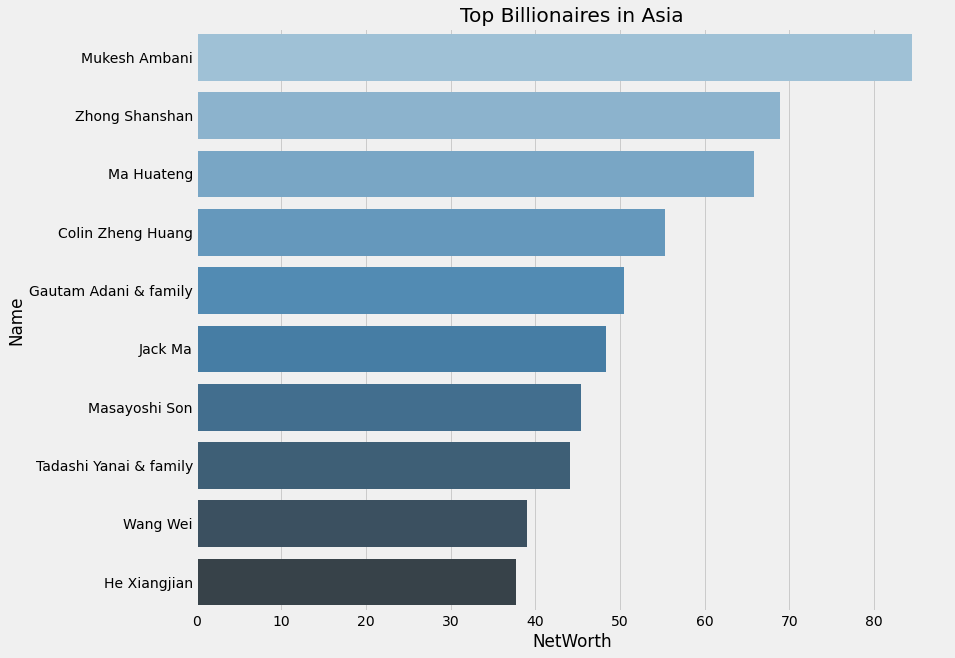

In [159]:
plt.figure(figsize=(12,10))
plt.title("Top Billionaires in Asia")
#plt.style.use("fivethirtyeight")
sns.barplot(y="Name", x="NetWorth",palette="Blues_d", data=billionaires_Asia)

plt.ylabel("Name")
plt.xlabel("NetWorth")


plt.show()

### 4. Who are the top billionaires in Africa?

### 5. How many billionaires do we have in America?

In [207]:
billionaires_America = data[data["Country"] == "United States"]
billionaires_America

,Name,NetWorth,Country,Source,Rank,Age,Industry,Continent
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology,North America
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive,North America
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology,North America
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology,North America
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments,North America
...,...,...,...,...,...,...,...,...
2732,Vlad Tenev,1.0,United States,stock trading,2674,34.0,Finance & Investments,North America
2739,Vlad Vendrow & family,1.0,United States,software,2674,53.0,Technology,North America
2742,J. Wayne Weaver,1.0,United States,Shoes,2674,85.0,Diversified,North America
2743,Sandy Weill,1.0,United States,Citigroup,2674,88.0,Finance & Investments,North America


In [208]:
billionaires_America["Name"].count()

724

### 6. How many billionaires are under age 40 in the world?

In [210]:
Under_40 = data_drop_Age[data_drop_Age.Age <= 40]
Under_40

,Name,NetWorth,Country,Source,Rank,Age,Industry
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
38,Zhang Yiming,35.6,China,TikTok,39,37.0,Technology
49,Yang Huiyan & family,29.6,China,real estate,50,39.0,Real Estate
106,Dustin Moskovitz,17.8,United States,Facebook,107,36.0,Technology
107,Su Hua,17.8,China,video streaming,107,39.0,Media & Entertainment
...,...,...,...,...,...,...,...
2648,Anne Werninghaus,1.1,Brazil,industrial machinery,2524,35.0,Manufacturing
2675,Baiju Bhatt,1.0,United States,stock trading app,2674,36.0,Finance & Investments
2694,Hou Jianbin,1.0,China,education,2674,39.0,Service
2700,Kim Kardashian West,1.0,United States,"cosmetics, reality TV",2674,40.0,Fashion & Retail


In [206]:
Under_40["Name"].count()

121

### 7. Which countries have the least number of billionaires?

In [212]:
data.Country.value_counts()

United States           724
China                   626
India                   140
Germany                 136
Russia                  118
                       ... 
Nepal                     1
Eswatini (Swaziland)      1
Macao                     1
Tanzania                  1
Liechtenstein             1
Name: Country, Length: 70, dtype: int64

In [239]:
least_billionaires_country = data.Country.value_counts().tail(20)
least_billionaires_country = pd.DataFrame(least_billionaires_country)


,index,Country
0,Hungary,2
1,Morocco,2
2,Iceland,2
3,Georgia,2
4,New Zealand,2
5,Romania,2
6,Slovakia,2
7,Portugal,2
8,Qatar,2
9,Zimbabwe,1
